# CIND 820 Traffic Collision Data Analysis and Prediction

ID: 500866890

### Initial Results and Code



---

**Intro**

This project aims to analyze road accident data from 2017-2023 to gain insights into the factors contributing to accidents, identify patterns, and propose data-driven recommendations for improving road safety. The dataset used in this project contains information about various aspects of road accidents, such as location, time, weather conditions, and severity.


**Github Repo**

https://github.com/mkleung/traffic-collision-analysis



**Table of Contents**

1.   Data Import and Description
2.   Data Preprocessing
3.   Exploratory Data Analysis
5.   Data Analysis using Apriori
6.   Collision Prediction using Decision Tree and Random Forest
7.   Comparison and Results



## Dataset Overview
- **Source:** https://open.ottawa.ca/datasets/ottawa::traffic-collision-data/about
- **Size:** 74,613 rows, 29 columns
- **Date Range:** 2017-2023
- **Format:** CSV
- **Copyright:** Open Data Licence Version 2.0 (worldwide, royalty-free, perpetual, non-exclusive licence to copy, modify, publish, translate, adapt and distribute

## Goal of project
- **Use Case:** Predicting Traffic Collision
- **Industry:** Transportation Safety and Traffic management
-  **Users:** City planners, Law enforcement, General public, Cyclists
- **Result:** Develop an application that can predict collision probability from a user input location or a planned route (tentative).

## Questions

These are some of the questions we will be investigating during this project

*  What are the locations where the most frequent accidents occur?
*  Do weather and environmental conditions affect traffic collisions?
*  Do traffic measures decrease traffic collisions?

In [1]:
%reset -f

In [3]:
# Packages to install
# Y-data-profiling for eda report

%%capture

# Create EDA report
!pip install ydata-profiling -q

# Display maps
!pip install pandas folium -q

# Preprocessing
!pip install scikit-learn --upgrade -q


# Section 1. Data Import and Description

---



In [4]:
# Import Libraries and load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Preproprecessing
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Import clustering algorithms like kmeans and DBSCan
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

# Import Classification Models
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Import Metrics and Reports
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

%matplotlib inline

pd.pandas.set_option('display.max_columns', None)
data=pd.read_csv("Traffic_Collision_Data.csv")
data.head(10)

,X,Y,ID,Geo_ID,Accident_Year,Accident_Date,Accident_Time,Location,Location_Type,Classification_Of_Accident,Initial_Impact_Type,Road_Surface_Condition,Environment_Condition,Light,Traffic_Control,Num_of_Vehicle,Num_Of_Pedestrians,Num_of_Bicycles,Num_of_Motorcycles,Max_Injury,Num_of_Injuries,Num_of_Minimal_Injuries,Num_of_Minor_Injuries,Num_of_Major_Injuries,Num_of_Fatal_Injuries,X_Coordinate,Y_Coordinate,Lat,Long,ObjectId
0,-8.452607e+06,5.661674e+06,2017--1,__5RG32N,NaN,2017/01/01,1:28,WEST RIDGE DR btwn PARLOR PL & BERT G. ARGUE D...,Midblock,03 - P.D. only,07 - SMV other,03 - Loose snow,02 - Rain,07 - Dark,10 - No control,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,349455.5394,5012882.095,45.254481,-75.931061,1
1,-8.422792e+06,5.689206e+06,2017--2,__3Z07B5,NaN,2017/01/01,3:16,VANIER PKWY SB btwn DONALD ST & MCARTHUR AVE (...,Midblock,03 - P.D. only,04 - Sideswipe,03 - Loose snow,03 - Snow,07 - Dark,10 - No control,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370277.0644,5032383.845,45.428323,-75.663225,2
2,-8.440990e+06,5.672790e+06,2017--3,639,NaN,2017/01/01,7:17,OLD RICHMOND RD @ ROBERTSON RD (0000639),Intersection,03 - P.D. only,07 - SMV other,01 - Dry,05 - Drifting Snow,03 - Dawn,01 - Traffic signal,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,357581.5159,5020752.206,45.324735,-75.826700,3
3,-8.429778e+06,5.674892e+06,2017--4,9776,NaN,2017/01/01,8:58,MERIVALE RD @ WOODFIELD DR/ROYDON PL (0009776),Intersection,03 - P.D. only,03 - Rear end,03 - Loose snow,03 - Snow,01 - Daylight,01 - Traffic signal,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365462.7011,5022298.499,45.338011,-75.725984,4
4,-8.423751e+06,5.682144e+06,2017--5,7208,NaN,2017/01/01,11:41,BANK ST @ BELANGER AVE/LAMIRA ST (0007208),Intersection,03 - P.D. only,99 - Other,02 - Wet,01 - Clear,01 - Daylight,01 - Traffic signal,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,369653.7181,5027427.541,45.383786,-75.671842,5
5,-8.437041e+06,5.678668e+06,2017--6,2748,NaN,2017/01/01,12:08,POULIN AVE @ RICHMOND RD (0002748),Intersection,02 - Non-fatal injury,03 - Rear end,02 - Wet,03 - Snow,01 - Daylight,01 - Traffic signal,2,0,NaN,NaN,02 - Minor,1.0,NaN,1.0,NaN,NaN,360325.6759,5024900.519,45.361850,-75.791232,6
6,-8.415138e+06,5.692987e+06,2017--7,__3Z0CDR,NaN,2017/01/01,Unknown,EASTVALE DR btwn OGILVIE RD & LOYOLA AVE (__3Z...,Midblock,03 - P.D. only,06 - SMV unattended vehicle,04 - Slush,03 - Snow,00 - Unknown,10 - No control,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,375627.2581,5035090.654,45.452156,-75.594470,7
7,-8.436077e+06,5.672019e+06,2017--8,__3Z07PT,NaN,2017/01/01,20:26,WEST HUNT CLUB RD EB btwn CEDARVIEW RD & GREEN...,Midblock,03 - P.D. only,04 - Sideswipe,02 - Wet,01 - Clear,07 - Dark,10 - No control,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361045.7338,5020240.736,45.319864,-75.782571,8
8,-8.422145e+06,5.688649e+06,2017--9,8259,NaN,2017/01/01,20:43,QUEEN MARY ST @ QUILL ST (0008259),Intersection,03 - P.D. only,07 - SMV other,03 - Loose snow,01 - Clear,07 - Dark,02 - Stop sign,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370735.7151,5031998.578,45.424814,-75.657416,9
9,-8.432027e+06,5.678159e+06,2017--10,3209,NaN,2017/01/01,21:40,ERINDALE DR @ BASELINE RD (0003209),Intersection,03 - P.D. only,07 - SMV other,02 - Wet,01 - Clear,07 - Dark,02 - Stop sign,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,363857.6929,5024575.518,45.358637,-75.746190,10


In [5]:
# Show the descriptive statistics
data.describe()

,X,Y,Accident_Year,Num_of_Vehicle,Num_Of_Pedestrians,Num_of_Bicycles,Num_of_Motorcycles,Num_of_Injuries,Num_of_Minimal_Injuries,Num_of_Minor_Injuries,Num_of_Major_Injuries,Num_of_Fatal_Injuries,X_Coordinate,Y_Coordinate,Lat,Long,ObjectId
count,7.461200e+04,7.461200e+04,0.0,74612.000000,74612.000000,1347.000000,637.000000,13417.000000,5733.000000,7804.000000,671.000000,141.000000,74612.000000,7.461200e+04,74612.000000,74612.000000,74612.000000
mean,-8.428035e+06,5.670130e+06,NaN,1.841219,0.022289,1.010393,1.015699,1.298353,1.212977,1.226422,1.108793,1.070922,366572.012158,5.017227e+06,45.291930,-75.710325,37306.500000
std,1.870145e+04,2.316663e+05,NaN,0.586512,0.153846,0.115173,0.136459,0.734951,0.562083,0.585715,0.612139,0.283987,15213.451923,2.042363e+05,1.843572,0.167998,21538.773479
min,-8.820655e+06,0.000000e+00,NaN,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000,-79.237290,1.000000
25%,-8.433028e+06,5.674170e+06,NaN,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,363147.689000,5.021766e+06,45.333451,-75.755176,18653.750000
50%,-8.426515e+06,5.681383e+06,NaN,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,367676.548050,5.026853e+06,45.378984,-75.696671,37306.500000
75%,-8.420483e+06,5.687619e+06,NaN,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,371925.281000,5.031266e+06,45.418314,-75.642484,55959.250000
max,-8.378081e+06,5.704542e+06,NaN,25.000000,3.000000,3.000000,3.000000,38.000000,11.000000,10.000000,14.000000,3.000000,401821.931000,5.043439e+06,45.524921,-75.261583,74612.000000


**Summary of Data Description**

*  Accident_Year has 100% missing values                 
*  These attributes all have >80% missing values:
   * Num_of_Bicycles, Num_of_Motorcycles, Max_Injury, Num_of_Injuries, Num_of_Minimal_Injuries, Num_of_Minor_Injuries, Num_of_Major_Injuries, Num_of_Fatal_Injuries
* These have < 5 missing values
  * Traffic_Control, Initial_Impact_Type, Road_Surface_Condition, environmental condition
*  The column Accident_Time contains some "Unknown" or Null values
*  X, Y, GeoID, X_Cordinate, Y_Coordinate are duplicates and not needed
*  ID, GEOID are metadata
*  Classification_Of_Accident, etc contains numbers corresponding categorical data



# Section 2. Data Cleaning and Preprocessing

---


In [6]:
df = data.copy()

# Drop Redundant Columns

# Accident_Year contains only null values
# ObjectID, Geo_ID, ID are database primary keys
# X_Coordinate, Y_Coordinate, X , Y are duplicates of long, lat
# Location column is irrelevant as lat and long are going to be used in this project
# Num_of_Minimal_Injuries, Num_of_Minor_Injuries, Num_of_Major_Injuries are not required
# as we will use num_of_injuries and fatal injuries
# Location_Type, Classification_Of_Accident both contain only 2 unique values
# which are not descriptive enought for our analysis

columns_to_drop = [
     "Accident_Year",
     "Geo_ID", "ObjectId", "ID",
     "X", "Y", "X_Coordinate", "Y_Coordinate",
     "Location",
     "Num_of_Minimal_Injuries", "Num_of_Minor_Injuries", "Num_of_Major_Injuries",
     "Location_Type", "Classification_Of_Accident", "Initial_Impact_Type"
]
df = df.drop(columns=columns_to_drop)
df.head()


,Accident_Date,Accident_Time,Road_Surface_Condition,Environment_Condition,Light,Traffic_Control,Num_of_Vehicle,Num_Of_Pedestrians,Num_of_Bicycles,Num_of_Motorcycles,Max_Injury,Num_of_Injuries,Num_of_Fatal_Injuries,Lat,Long
0,2017/01/01,1:28,03 - Loose snow,02 - Rain,07 - Dark,10 - No control,1,0,NaN,NaN,NaN,NaN,NaN,45.254481,-75.931061
1,2017/01/01,3:16,03 - Loose snow,03 - Snow,07 - Dark,10 - No control,2,0,NaN,NaN,NaN,NaN,NaN,45.428323,-75.663225
2,2017/01/01,7:17,01 - Dry,05 - Drifting Snow,03 - Dawn,01 - Traffic signal,1,0,NaN,NaN,NaN,NaN,NaN,45.324735,-75.826700
3,2017/01/01,8:58,03 - Loose snow,03 - Snow,01 - Daylight,01 - Traffic signal,2,0,NaN,NaN,NaN,NaN,NaN,45.338011,-75.725984
4,2017/01/01,11:41,02 - Wet,01 - Clear,01 - Daylight,01 - Traffic signal,2,0,NaN,NaN,NaN,NaN,NaN,45.383786,-75.671842


In [7]:
# Remove Unknown values from te Accident_Time and replace with median
# For example, row number 6 has an unknown time

df['Accident_Time1'] = pd.to_datetime(df['Accident_Time'], errors='coerce', format='%H:%M')
median_time = df['Accident_Time1'].dropna().median()
if pd.notnull(median_time):
    median_time_str = median_time.strftime('%H:%M')

df['Accident_Time'] = df['Accident_Time'].replace("Unknown", median_time_str)
df = df.drop(columns=['Accident_Time1'])
df.head(10)


,Accident_Date,Accident_Time,Road_Surface_Condition,Environment_Condition,Light,Traffic_Control,Num_of_Vehicle,Num_Of_Pedestrians,Num_of_Bicycles,Num_of_Motorcycles,Max_Injury,Num_of_Injuries,Num_of_Fatal_Injuries,Lat,Long
0,2017/01/01,1:28,03 - Loose snow,02 - Rain,07 - Dark,10 - No control,1,0,NaN,NaN,NaN,NaN,NaN,45.254481,-75.931061
1,2017/01/01,3:16,03 - Loose snow,03 - Snow,07 - Dark,10 - No control,2,0,NaN,NaN,NaN,NaN,NaN,45.428323,-75.663225
2,2017/01/01,7:17,01 - Dry,05 - Drifting Snow,03 - Dawn,01 - Traffic signal,1,0,NaN,NaN,NaN,NaN,NaN,45.324735,-75.826700
3,2017/01/01,8:58,03 - Loose snow,03 - Snow,01 - Daylight,01 - Traffic signal,2,0,NaN,NaN,NaN,NaN,NaN,45.338011,-75.725984
4,2017/01/01,11:41,02 - Wet,01 - Clear,01 - Daylight,01 - Traffic signal,2,0,NaN,NaN,NaN,NaN,NaN,45.383786,-75.671842
5,2017/01/01,12:08,02 - Wet,03 - Snow,01 - Daylight,01 - Traffic signal,2,0,NaN,NaN,02 - Minor,1.0,NaN,45.361850,-75.791232
6,2017/01/01,14:39,04 - Slush,03 - Snow,00 - Unknown,10 - No control,1,0,NaN,NaN,NaN,NaN,NaN,45.452156,-75.594470
7,2017/01/01,20:26,02 - Wet,01 - Clear,07 - Dark,10 - No control,2,0,NaN,NaN,NaN,NaN,NaN,45.319864,-75.782571
8,2017/01/01,20:43,03 - Loose snow,01 - Clear,07 - Dark,02 - Stop sign,1,0,NaN,NaN,NaN,NaN,NaN,45.424814,-75.657416
9,2017/01/01,21:40,02 - Wet,01 - Clear,07 - Dark,02 - Stop sign,1,0,NaN,NaN,NaN,NaN,NaN,45.358637,-75.746190


In [8]:
# Combine the date and time into one column
def combine_date_time(row):
    try:
        return pd.to_datetime(f"{row['Accident_Date']} {row['Accident_Time']}")
    except Exception:
        return pd.NaT
df['Accident_Timestamp'] = df.apply(combine_date_time, axis=1)
df = df.drop(columns=['Accident_Date','Accident_Time'])
df.head(1)

,Road_Surface_Condition,Environment_Condition,Light,Traffic_Control,Num_of_Vehicle,Num_Of_Pedestrians,Num_of_Bicycles,Num_of_Motorcycles,Max_Injury,Num_of_Injuries,Num_of_Fatal_Injuries,Lat,Long,Accident_Timestamp
0,03 - Loose snow,02 - Rain,07 - Dark,10 - No control,1,0,NaN,NaN,NaN,NaN,NaN,45.254481,-75.931061,2017-01-01 01:28:00


In [9]:
# Clean data inside category columns

df['Road_Surface_Condition'] = df['Road_Surface_Condition'].str.replace(r'^\d+\s*-\s*', '', regex=True)
df['Environment_Condition'] = df['Environment_Condition'].str.replace(r'^\d+\s*-\s*', '', regex=True)
df['Light'] = df['Light'].str.replace(r'^\d+\s*-\s*', '', regex=True)
df['Traffic_Control'] = df['Traffic_Control'].str.replace(r'^\d+\s*-\s*', '', regex=True)
df['Max_Injury'] = df['Max_Injury'].str.replace(r'^\d+\s*-\s*', '', regex=True)
df.head(1)

,Road_Surface_Condition,Environment_Condition,Light,Traffic_Control,Num_of_Vehicle,Num_Of_Pedestrians,Num_of_Bicycles,Num_of_Motorcycles,Max_Injury,Num_of_Injuries,Num_of_Fatal_Injuries,Lat,Long,Accident_Timestamp
0,Loose snow,Rain,Dark,No control,1,0,NaN,NaN,NaN,NaN,NaN,45.254481,-75.931061,2017-01-01 01:28:00


In [10]:
# Remove Null Values

# Replace null values with zero in these columns that have 80% null values
# Context: these null values should be zero because there are no injuries.
columns_to_fill = [
    'Num_of_Bicycles',
    'Num_of_Motorcycles',
    'Num_of_Injuries',
    'Num_of_Fatal_Injuries'
]
for column in columns_to_fill:
    df[column] = df[column].fillna(0)

# Remove the rows that have less than 5 null values
df.dropna(subset=['Road_Surface_Condition'], inplace=True)
df.dropna(subset=['Environment_Condition'], inplace=True)
df.dropna(subset=['Traffic_Control'], inplace=True)

# Max_Injury (Categorical) - null values means no injury sustained will be filled with None
df['Max_Injury'] = df['Max_Injury'].fillna("None")

df.head()

,Road_Surface_Condition,Environment_Condition,Light,Traffic_Control,Num_of_Vehicle,Num_Of_Pedestrians,Num_of_Bicycles,Num_of_Motorcycles,Max_Injury,Num_of_Injuries,Num_of_Fatal_Injuries,Lat,Long,Accident_Timestamp
0,Loose snow,Rain,Dark,No control,1,0,0.0,0.0,None,0.0,0.0,45.254481,-75.931061,2017-01-01 01:28:00
1,Loose snow,Snow,Dark,No control,2,0,0.0,0.0,None,0.0,0.0,45.428323,-75.663225,2017-01-01 03:16:00
2,Dry,Drifting Snow,Dawn,Traffic signal,1,0,0.0,0.0,None,0.0,0.0,45.324735,-75.826700,2017-01-01 07:17:00
3,Loose snow,Snow,Daylight,Traffic signal,2,0,0.0,0.0,None,0.0,0.0,45.338011,-75.725984,2017-01-01 08:58:00
4,Wet,Clear,Daylight,Traffic signal,2,0,0.0,0.0,None,0.0,0.0,45.383786,-75.671842,2017-01-01 11:41:00


In [11]:
# Check if there are any missing values remaining
print(df.isnull().sum())

Road_Surface_Condition    0
Environment_Condition     0
Light                     0
Traffic_Control           0
Num_of_Vehicle            0
Num_Of_Pedestrians        0
Num_of_Bicycles           0
Num_of_Motorcycles        0
Max_Injury                0
Num_of_Injuries           0
Num_of_Fatal_Injuries     0
Lat                       0
Long                      0
Accident_Timestamp        0
dtype: int64


In [12]:
# Drop duplicates
Num_of_duplicates = sum(df.duplicated())
df = df.drop_duplicates()
print("Duplicates rows dropped:\n", Num_of_duplicates)

Duplicates rows dropped:
 10


In [13]:
# Standardize column names
# Some column names have missing 's' and wrong capital letters
# Max_Injury is a confusing column title and is renamed to Injury_Type

df.rename(columns={'Num_of_Vehicle': 'Num_of_Vehicles'}, inplace=True)
df.rename(columns={'Num_Of_Pedestrians': 'Num_of_Pedestrians'}, inplace=True)
df.rename(columns={'Max_Injury': 'Injury_Type'}, inplace=True)
df.head(1)

,Road_Surface_Condition,Environment_Condition,Light,Traffic_Control,Num_of_Vehicles,Num_of_Pedestrians,Num_of_Bicycles,Num_of_Motorcycles,Injury_Type,Num_of_Injuries,Num_of_Fatal_Injuries,Lat,Long,Accident_Timestamp
0,Loose snow,Rain,Dark,No control,1,0,0.0,0.0,None,0.0,0.0,45.254481,-75.931061,2017-01-01 01:28:00


In [14]:
# Detect and Remove Outliers

# Lat contains some outliers because the min is 0
# Num_of_Injuries could have one outlier

# NOTE Z-Score or Interquartile range methods are not required for Lat and Long
# because their outliers are assumed to be user input errors or null values

df.describe()

,Num_of_Vehicles,Num_of_Pedestrians,Num_of_Bicycles,Num_of_Motorcycles,Num_of_Injuries,Num_of_Fatal_Injuries,Lat,Long,Accident_Timestamp
count,74598.000000,74598.000000,74598.000000,74598.000000,74598.000000,74598.000000,74598.000000,74598.000000,74598
mean,1.841256,0.022293,0.018231,0.008673,0.233505,0.002024,45.292519,-75.710279,2019-09-11 01:06:28.755730944
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-79.237290,2017-01-01 00:15:00
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.333437,-75.755173,2018-04-13 15:20:15
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.378984,-75.696671,2019-07-06 16:48:30
75%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.418313,-75.642484,2021-01-26 16:19:30
max,25.000000,3.000000,3.000000,3.000000,38.000000,3.000000,45.524921,-75.261583,2022-12-30 14:20:00
std,0.586524,0.153860,0.135381,0.094303,0.588047,0.048115,1.836272,0.167509,NaN


In [15]:
# Investigate outliers in Num_of_Injuries
# This one value is the one off famous bus crash in 2019

column_name = 'Num_of_Injuries'
temp_injuries = df[df[column_name] > 10]
temp_injuries


,Road_Surface_Condition,Environment_Condition,Light,Traffic_Control,Num_of_Vehicles,Num_of_Pedestrians,Num_of_Bicycles,Num_of_Motorcycles,Injury_Type,Num_of_Injuries,Num_of_Fatal_Injuries,Lat,Long,Accident_Timestamp
29688,Unknown,Clear,Daylight,No control,1,0,0.0,0.0,Fatal,38.0,3.0,45.396613,-75.752107,2019-01-11 15:51:00


In [16]:
# Delete the outlier
row_index = 29688
df = df.drop(index=row_index)
df.reset_index(drop=True, inplace=True)

In [17]:
# Investigate latitude
# There are 130 rows with questionable latitudes which point to somewhere in the UK
column_name = 'Lat'
temp_lat = df[df[column_name] < 40]
temp_lat

,Road_Surface_Condition,Environment_Condition,Light,Traffic_Control,Num_of_Vehicles,Num_of_Pedestrians,Num_of_Bicycles,Num_of_Motorcycles,Injury_Type,Num_of_Injuries,Num_of_Fatal_Injuries,Lat,Long,Accident_Timestamp
564,Dry,Clear,Daylight,Traffic signal,2,0,0.0,0.0,None,0.0,0.0,3.318485,-75.940952,2017-01-22 15:06:00
1695,Dry,Clear,Daylight,Traffic signal,2,0,0.0,0.0,None,0.0,0.0,3.318485,-75.940952,2017-02-02 14:36:00
2211,Dry,Clear,Daylight,Traffic signal,2,0,0.0,0.0,None,0.0,0.0,3.318485,-75.940952,2017-03-19 17:20:00
2530,Dry,Clear,Daylight,Traffic signal,2,0,0.0,1.0,None,0.0,0.0,3.318485,-75.940952,2017-03-21 16:39:00
3035,Dry,Clear,Daylight,Traffic signal,2,0,0.0,0.0,None,0.0,0.0,3.318485,-75.940952,2017-03-30 12:09:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71978,Dry,Clear,Daylight,Stop sign,2,0,0.0,0.0,None,0.0,0.0,0.000000,-79.237290,2022-09-28 15:09:00
71989,Dry,Clear,Dark,No control,1,0,0.0,0.0,None,0.0,0.0,0.000000,-79.237290,2022-10-30 19:10:00
72398,Dry,Clear,Dark,No control,1,0,0.0,0.0,None,0.0,0.0,0.000000,-79.237290,2022-10-09 06:33:00
72853,Dry,Clear,Dawn,No control,1,0,0.0,0.0,None,0.0,0.0,0.000000,-79.237290,2022-10-28 17:23:00


In [18]:
# Remove the questionable latitudes
df = df[df['Lat'] >= 40]
df.reset_index(drop=True, inplace=True)

**Feature Engineering**

In [ ]:
# Create a boolean column?

# df['Collision'] = df['Num_of_Injuries'] > 0
# df['Collision'] = df['Collision'].astype(int)
# df.head()

,Road_Surface_Condition,Environment_Condition,Light,Traffic_Control,Num_of_Vehicles,Num_of_Pedestrians,Num_of_Bicycles,Num_of_Motorcycles,Injury_Type,Num_of_Injuries,Num_of_Fatal_Injuries,Lat,Long,Accident_Timestamp,Collision
0,Loose snow,Rain,Dark,No control,1,0,0.0,0.0,None,0.0,0.0,45.254481,-75.931061,2017-01-01 01:28:00,0
1,Loose snow,Snow,Dark,No control,2,0,0.0,0.0,None,0.0,0.0,45.428323,-75.663225,2017-01-01 03:16:00,0
2,Dry,Drifting Snow,Dawn,Traffic signal,1,0,0.0,0.0,None,0.0,0.0,45.324735,-75.826700,2017-01-01 07:17:00,0
3,Loose snow,Snow,Daylight,Traffic signal,2,0,0.0,0.0,None,0.0,0.0,45.338011,-75.725984,2017-01-01 08:58:00,0
4,Wet,Clear,Daylight,Traffic signal,2,0,0.0,0.0,None,0.0,0.0,45.383786,-75.671842,2017-01-01 11:41:00,0


**Cardinality**

In [19]:
categorical_features = ['Traffic_Control', 'Light', 'Road_Surface_Condition', 'Environment_Condition']
for col in categorical_features:
    print(f"{col}: {df[col].nunique()} unique values out of {len(df)} rows.")

Traffic_Control: 12 unique values out of 74467 rows.
Light: 6 unique values out of 74467 rows.
Road_Surface_Condition: 11 unique values out of 74467 rows.
Environment_Condition: 9 unique values out of 74467 rows.


**Chi Square Test**

In [20]:
# from scipy.stats import chi2_contingency
# for col in categorical_features:
#     contingency_table = pd.crosstab(df[col], df['Collision'])
#     chi2, p, _, _ = chi2_contingency(contingency_table)
#     print(f"{col}: Chi-square p-value = {p:.4f}")

KeyError: 'Collision'

**One Hot Encoding**

In [48]:
# Step 5: One Hot Encode the categorical variables
columns_to_encode = ['Road_Surface_Condition', 'Environment_Condition', 'Light','Traffic_Control', 'Injury_Type']

# Ensure the columns to be encoded are treated as strings
for col in columns_to_encode:
    df[col] = df[col].astype(str)

# Perform one-hot encoding
encoded_df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

# Display the resulting dataset's shape to confirm encoding
print("Original dataset shape:", df.shape)
print("Encoded dataset shape:", encoded_df.shape)


Original dataset shape: (74467, 14)
Encoded dataset shape: (74467, 47)


In [22]:
unique_counts = encoded_df.nunique()

# Print the count of unique values
for column, count in unique_counts.items():
    print(f"Number of unique values in '{column}': {count}")

Number of unique values in 'Num_of_Vehicles': 10
Number of unique values in 'Num_of_Pedestrians': 4
Number of unique values in 'Num_of_Bicycles': 4
Number of unique values in 'Num_of_Motorcycles': 4
Number of unique values in 'Num_of_Injuries': 10
Number of unique values in 'Num_of_Fatal_Injuries': 3
Number of unique values in 'Lat': 42382
Number of unique values in 'Long': 42165
Number of unique values in 'Accident_Timestamp': 70045
Number of unique values in 'Road_Surface_Condition_Ice': 2
Number of unique values in 'Road_Surface_Condition_Loose sand or gravel': 2
Number of unique values in 'Road_Surface_Condition_Loose snow': 2
Number of unique values in 'Road_Surface_Condition_Mud': 2
Number of unique values in 'Road_Surface_Condition_Other': 2
Number of unique values in 'Road_Surface_Condition_Packed snow': 2
Number of unique values in 'Road_Surface_Condition_Slush': 2
Number of unique values in 'Road_Surface_Condition_Spilled liquid': 2
Number of unique values in 'Road_Surface_Co

**Summary of Data preprocessing**

* Numeric Columns that have greater greater than 80% null values have been replaced by zero because they have been likely been omitted during the data entry phase.
* Category Columns that have less than 5 null were removed
* Column titles have been renamed
* Several irrelevant Columns have been dropped
* Duplicates have been removed
* Outliers were found and latitude and removed.
* Categorical columns have been one hot encoded

In [49]:
encoded_df.to_csv('encoded_df.csv', index=False)

In [28]:
df.to_csv('df.csv', index=False)

# Section 3.   Exploratory Data Analysis and Visualization
---





array([[<Axes: title={'center': 'Num_of_Vehicles'}>,
        <Axes: title={'center': 'Num_of_Pedestrians'}>,
        <Axes: title={'center': 'Num_of_Bicycles'}>],
       [<Axes: title={'center': 'Num_of_Motorcycles'}>,
        <Axes: title={'center': 'Num_of_Injuries'}>,
        <Axes: title={'center': 'Num_of_Fatal_Injuries'}>],
       [<Axes: title={'center': 'Lat'}>,
        <Axes: title={'center': 'Long'}>,
        <Axes: title={'center': 'Accident_Timestamp'}>],
       [<Axes: title={'center': 'Collision'}>, <Axes: >, <Axes: >]],
      dtype=object)

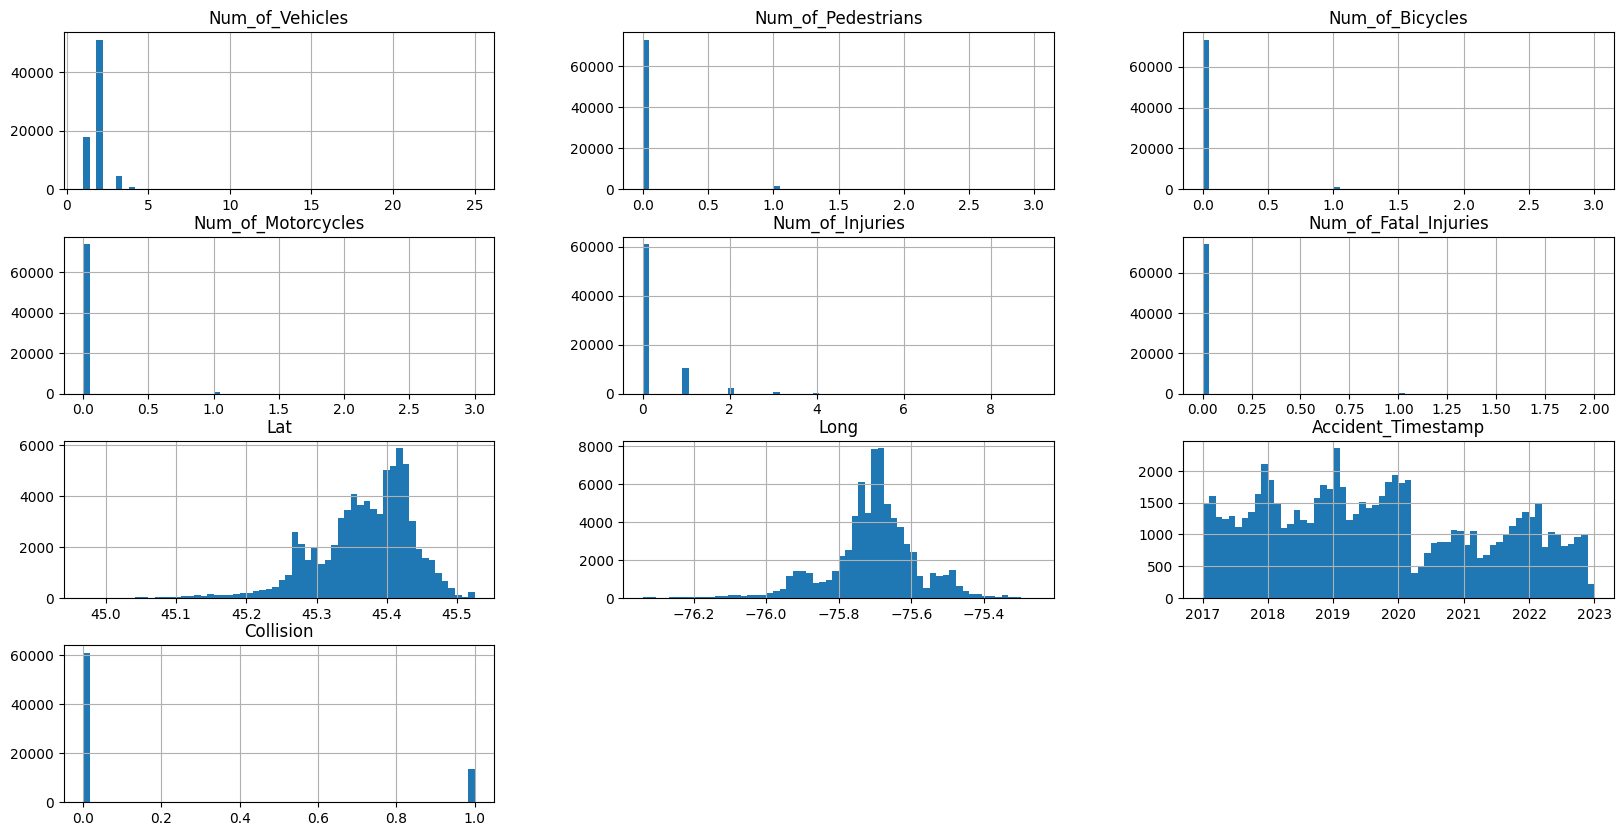

In [ ]:
# Create histograms to look for any other outliers
encoded_df.hist(bins=60, figsize=(20,10))

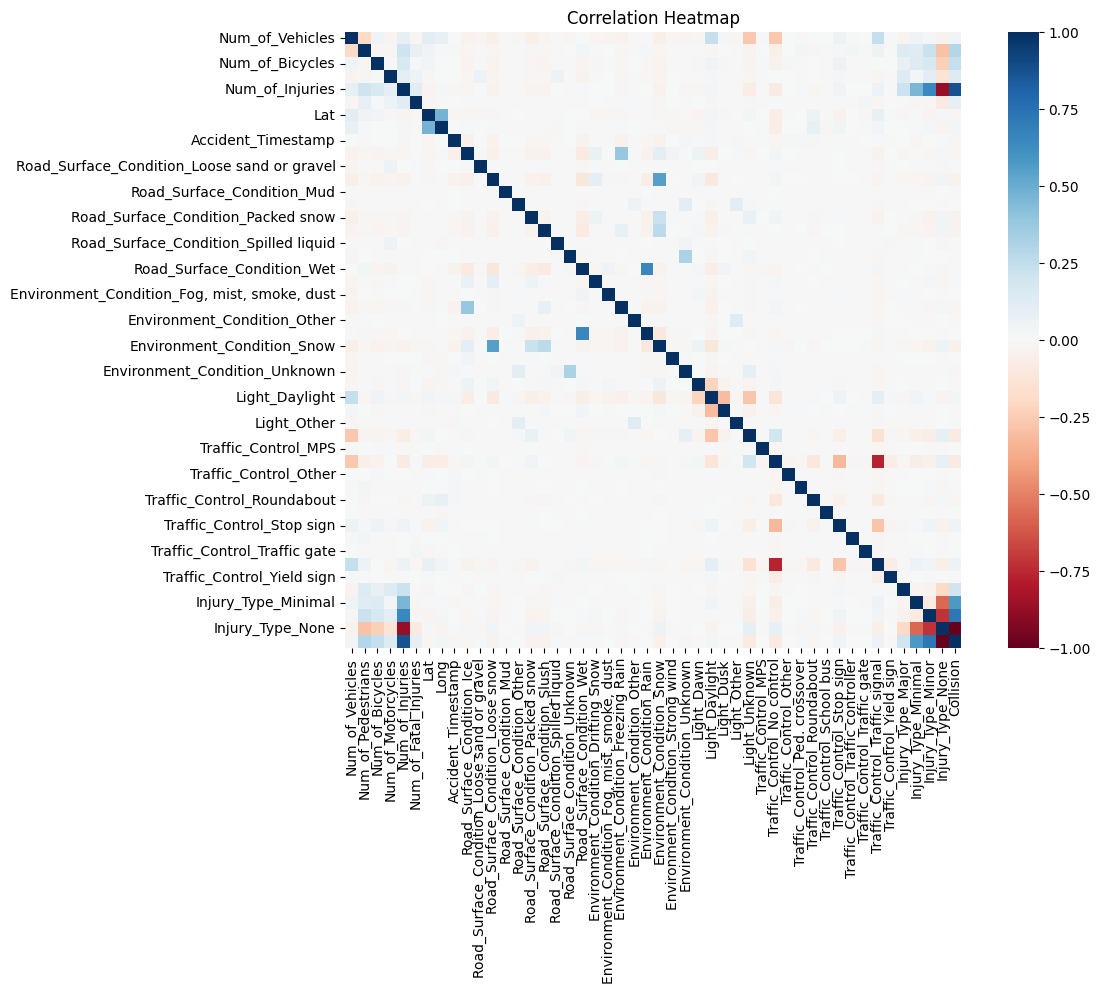

In [ ]:
# Correlation Heatmap

correlation_matrix = encoded_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, fmt='.2f', cmap='RdBu', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Show highest correlations
correlation_pairs = correlation_matrix.unstack()
sorted_correlations = correlation_pairs.sort_values(ascending=False)
sorted_correlations = sorted_correlations[sorted_correlations < 1]
top_correlations = sorted_correlations.head(10)
print("Top 50 Correlations:")
top_correlations

Top 50 Correlations:


Num_of_Injuries             Collision                     0.870618
Collision                   Num_of_Injuries               0.870618
                            Injury_Type_Minor             0.720208
Injury_Type_Minor           Collision                     0.720208
Environment_Condition_Rain  Road_Surface_Condition_Wet    0.655352
Road_Surface_Condition_Wet  Environment_Condition_Rain    0.655352
Num_of_Injuries             Injury_Type_Minor             0.644281
Injury_Type_Minor           Num_of_Injuries               0.644281
Injury_Type_Minimal         Collision                     0.572752
Collision                   Injury_Type_Minimal           0.572752
dtype: float64

**Anova Test**

In [ ]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Road_Surface_Condition_Ice
# Traffic_Control_No control
# Environment_Condition_Rain


# Example: ANOVA to see the effect of 'Road_Surface_Condition' on 'Num_of_Injuries'
model = ols('Num_of_Injuries ~ C(Environment_Condition_Rain)', data=encoded_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

anova_table

,sum_sq,df,F,PR(>F)
C(Environment_Condition_Rain),0.077881,1.0,0.238268,0.625461
Residual,24339.967400,74465.0,NaN,NaN


**Principal Component Analysis**

Explained variance by each component: [0.22313213 0.19705393]


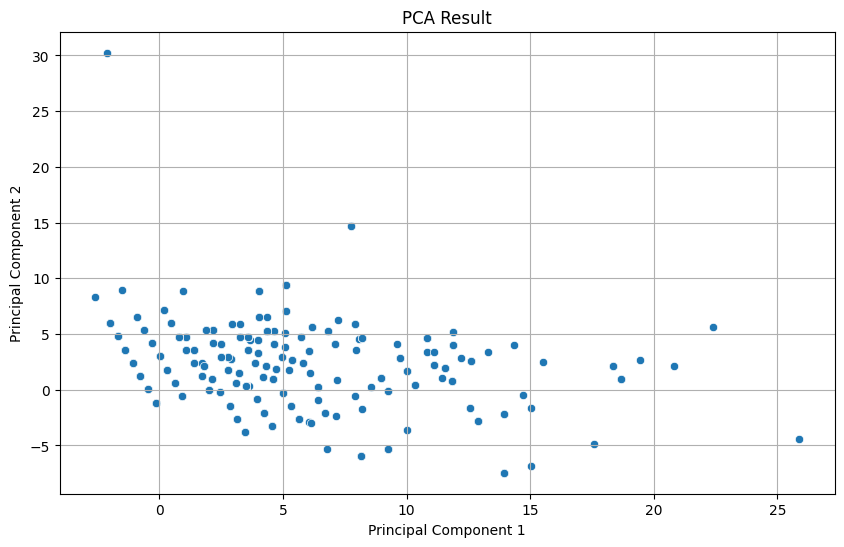

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select numerical features for PCA
# Replace with your relevant numerical columns
numerical_features = [
    'Num_of_Vehicles', 'Num_of_Pedestrians', 'Num_of_Bicycles',
    'Num_of_Motorcycles', 'Num_of_Injuries', 'Num_of_Fatal_Injuries',
    # Add other relevant numerical columns
]

# Drop rows with missing values in the selected features
encoded_df_numerical = encoded_df[numerical_features].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_df_numerical)

# Perform PCA
pca = PCA(n_components=2)  # Adjust components as needed
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')

# Plot the principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pc_df['PC1'], y=pc_df['PC2'])
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

**Cardinality**

In [ ]:
from scipy.stats import chi2_contingency

# Cardinality
categorical_features = ['Traffic_Control', 'Light', 'Road_Surface_Condition', 'Environment_Condition']
for col in categorical_features:
    print(f"{col}: {df[col].nunique()} unique values out of {len(df)} rows.")


Traffic_Control: 12 unique values out of 74467 rows.
Light: 6 unique values out of 74467 rows.
Road_Surface_Condition: 11 unique values out of 74467 rows.
Environment_Condition: 9 unique values out of 74467 rows.


**Visualizations (Histograms and Maps)**

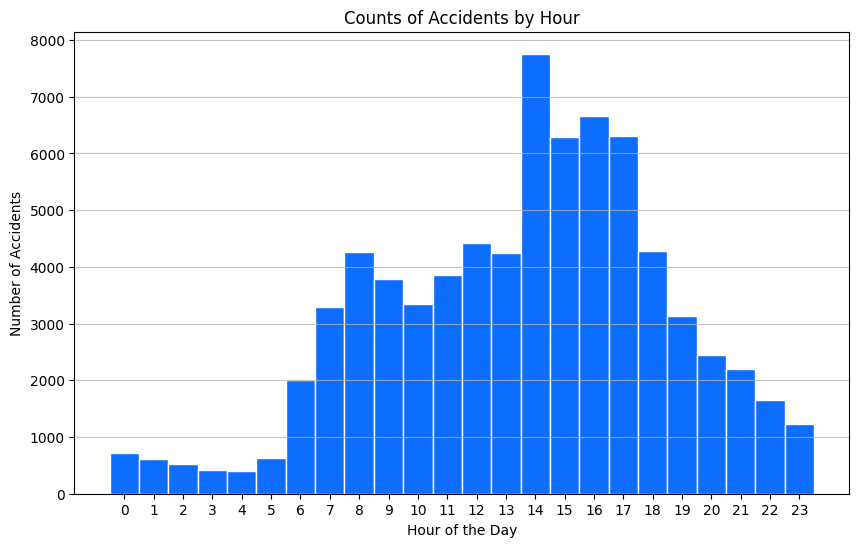

In [ ]:
# Create accident count by the hour of the day
encoded_df['Hour'] = encoded_df['Accident_Timestamp'].dt.hour
plt.figure(figsize=(10, 6))

# Use encoded_df instead of df to ensure consistency
plt.hist(encoded_df['Hour'], bins=range(0, 25), align='left', color='#0d6efd', edgecolor='#fff')

plt.xticks(range(0, 24))
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Counts of Accidents by Hour')
plt.grid(axis='y', alpha=0.75)
plt.show()


**Insight**
* The highest accidents occur in the afternoon at around 2pm - 6pm
* Lowest happen at night from 11pm to 6am

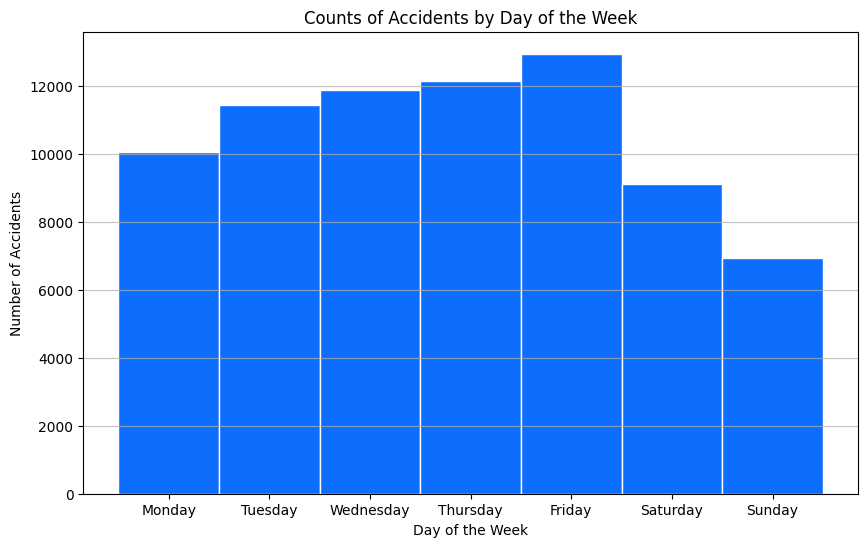

In [ ]:
# Histogram of accidents happening during the week
encoded_df['Accident_Timestamp'] = pd.to_datetime(encoded_df['Accident_Timestamp'])

# Extract the day of the week (0=Monday, 6=Sunday)
encoded_df['Day_of_Week'] = encoded_df['Accident_Timestamp'].dt.dayofweek

# Create a histogram of accidents by day of the week
plt.figure(figsize=(10, 6))
plt.hist(encoded_df['Day_of_Week'], bins=range(8), align='left', color='#0d6efd', edgecolor='#fff')

# Set the x-ticks to represent days of the week
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Add labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.title('Counts of Accidents by Day of the Week')

# Show grid and plot
plt.grid(axis='y', alpha=0.75)
plt.show()


**Insight**
* A lot of accidents happen during the week with Friday the highest.
* Surprisingly, weekends have low accident rates compared to weekdays

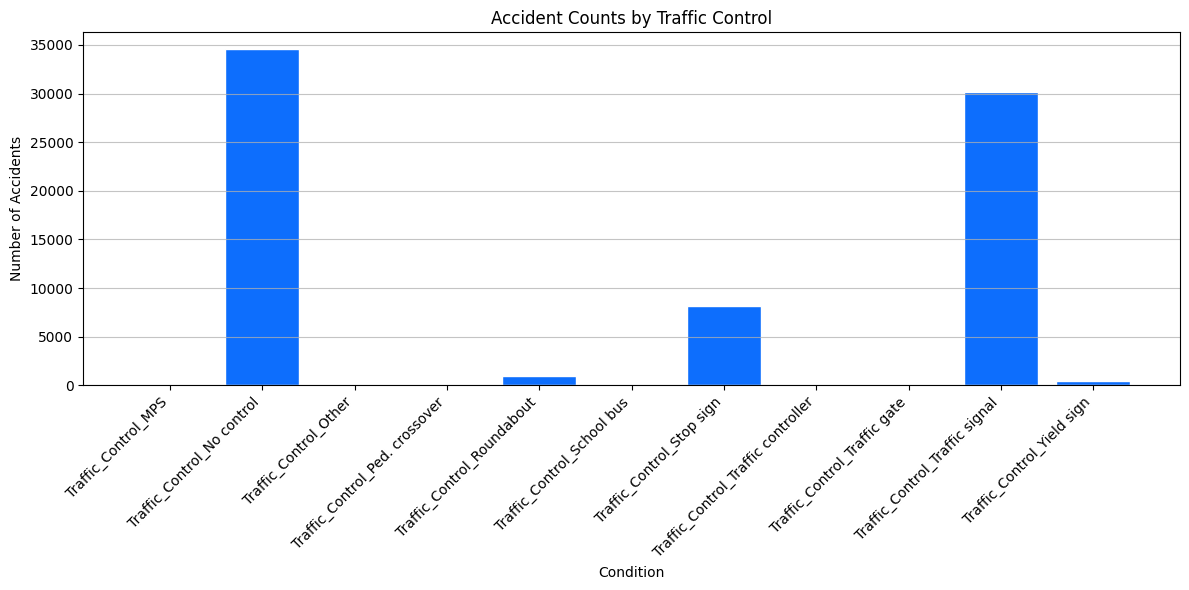

In [ ]:
# Function to create histograms
def plot_accident_counts_by_condition(df, column_prefix, title):
    condition_columns = [col for col in df.columns if col.startswith(column_prefix)]
    condition_counts = df[condition_columns].sum().reset_index()
    condition_counts.columns = ['Condition', 'Accident Count']
    condition_counts = condition_counts[condition_counts['Accident Count'] > 0]
    plt.figure(figsize=(12, 6))
    plt.bar(condition_counts['Condition'], condition_counts['Accident Count'], color='#0d6efd', edgecolor='#fff' )
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Condition')
    plt.ylabel('Number of Accidents')
    plt.title(title)
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()

# Show histogram of accident counts per traffic control type
plot_accident_counts_by_condition(encoded_df, 'Traffic_Control_', 'Accident Counts by Traffic Control')


Highest accident counts happen when there is
*   No traffic Control
*   Traffic Signal



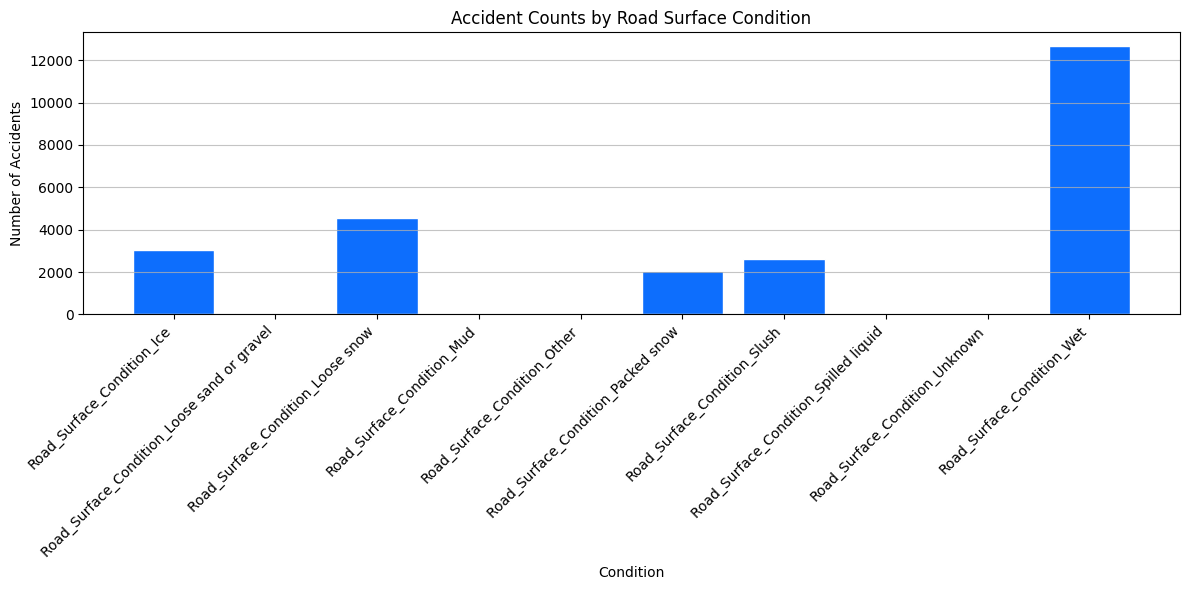

In [ ]:
# Call the function for road surface conditions
plot_accident_counts_by_condition(encoded_df, 'Road_Surface_Condition_', 'Accident Counts by Road Surface Condition')

*   Most accidents occur during wet weather



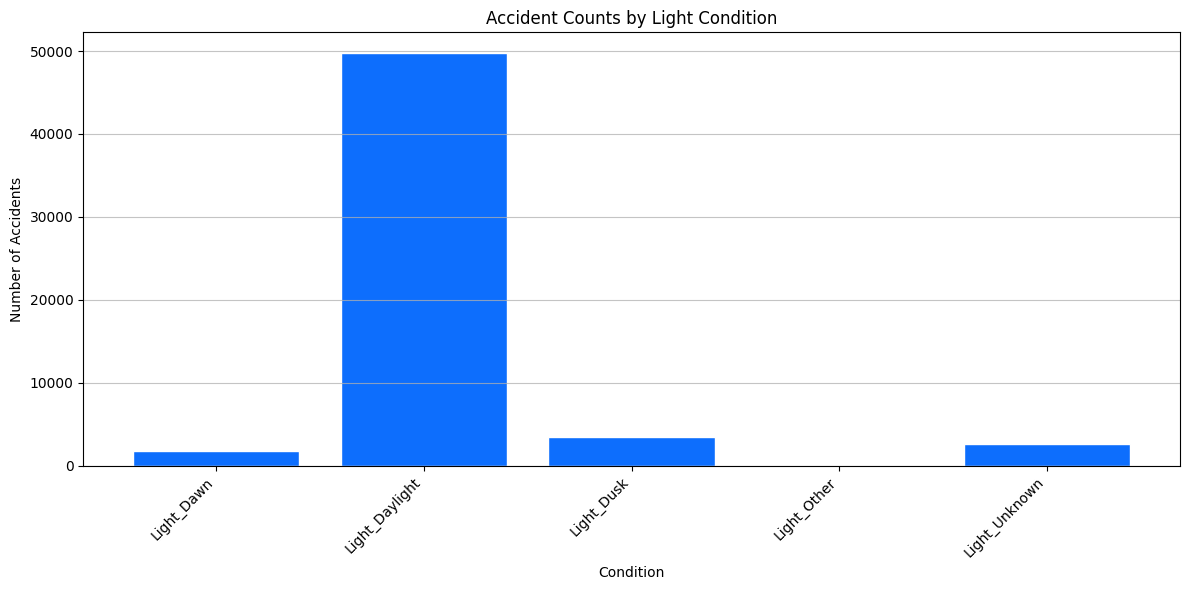

In [ ]:
plot_accident_counts_by_condition(encoded_df, 'Light_', 'Accident Counts by Light Condition')

In [ ]:
# Visualize the locations of fatal injuries

def create_map(df, lat_column, lon_column, value_column=None):

    m = folium.Map(location=[df[lat_column].mean(), df[lon_column].mean()], zoom_start=12, zoomControl=False)
    for _, row in df.iterrows():
        if row[value_column] > 0:
            Num_of_Fatal_Injuries = int(row.get("Num_of_Fatal_Injuries", 0)) if pd.notna(row.get("Num_of_Fatal_Injuries")) else 0
            Num_of_Injuries = int(row.get("Num_of_Injuries", 0)) if pd.notna(row.get("Num_of_Injuries")) else 0
            Num_of_Bicycles = int(row.get("Num_of_Bicycles", 0)) if pd.notna(row.get("Num_of_Bicycles")) else 0
            Num_of_Motorcycles = int(row.get("Num_of_Motorcycles", 0)) if pd.notna(row.get("Num_of_Motorcycles")) else 0
            popup_text = (
                f'<div style="width: 200px;">'
                f'<strong>Deaths:</strong> {Num_of_Fatal_Injuries}<br>'
                f'<strong>Injuries:</strong> {Num_of_Injuries}<br>'
                f'<strong>Vehicles:</strong> {row.get("Num_of_Vehicles", "N/A")}<br>'
                f'<strong>Pedestrians:</strong> {row.get("Num_of_Pedestrians", "N/A")}<br>'
                f'<strong>Bicycles:</strong> {Num_of_Bicycles}<br>'
                f'<strong>Motorcyles:</strong> {Num_of_Motorcycles}<br>'
                f'<strong>Time:</strong> {row.get("Accident_Timestamp", "N/A")}'
                f'</div>'
            )

            folium.CircleMarker(
                location=(row[lat_column], row[lon_column]),
                radius=2,
                color='red',
                fill=True,
                fill_color='red',
                fill_opacity=1,
                popup=popup_text
            ).add_to(m)

    return m

lat_column = 'Lat'
lon_column = 'Long'
value_column = 'Num_of_Fatal_Injuries'

map_with_dots = create_map(encoded_df, lat_column, lon_column, value_column)
map_with_dots

In [ ]:
encoded_df.head()

,Num_of_Vehicles,Num_of_Pedestrians,Num_of_Bicycles,Num_of_Motorcycles,Num_of_Injuries,Num_of_Fatal_Injuries,Lat,Long,Accident_Timestamp,Road_Surface_Condition_Ice,Road_Surface_Condition_Loose sand or gravel,Road_Surface_Condition_Loose snow,Road_Surface_Condition_Mud,Road_Surface_Condition_Other,Road_Surface_Condition_Packed snow,Road_Surface_Condition_Slush,Road_Surface_Condition_Spilled liquid,Road_Surface_Condition_Unknown,Road_Surface_Condition_Wet,Environment_Condition_Drifting Snow,"Environment_Condition_Fog, mist, smoke, dust",Environment_Condition_Freezing Rain,Environment_Condition_Other,Environment_Condition_Rain,Environment_Condition_Snow,Environment_Condition_Strong wind,Environment_Condition_Unknown,Light_Dawn,Light_Daylight,Light_Dusk,Light_Other,Light_Unknown,Traffic_Control_MPS,Traffic_Control_No control,Traffic_Control_Other,Traffic_Control_Ped. crossover,Traffic_Control_Roundabout,Traffic_Control_School bus,Traffic_Control_Stop sign,Traffic_Control_Traffic controller,Traffic_Control_Traffic gate,Traffic_Control_Traffic signal,Traffic_Control_Yield sign,Injury_Type_Major,Injury_Type_Minimal,Injury_Type_Minor,Injury_Type_None,Hour,Day_of_Week
0,1,0,0.0,0.0,0.0,0.0,45.254481,-75.931061,2017-01-01 01:28:00,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,1,6
1,2,0,0.0,0.0,0.0,0.0,45.428323,-75.663225,2017-01-01 03:16:00,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,3,6
2,1,0,0.0,0.0,0.0,0.0,45.324735,-75.826700,2017-01-01 07:17:00,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,7,6
3,2,0,0.0,0.0,0.0,0.0,45.338011,-75.725984,2017-01-01 08:58:00,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,8,6
4,2,0,0.0,0.0,0.0,0.0,45.383786,-75.671842,2017-01-01 11:41:00,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,11,6


# Section 4. Classification Models
---


we are interested in knowing if a person will get into a collision based on a specific location



# Logistic Regression


In [27]:
df_lr = df.copy()

# Create a binary target variable for collisions
df_lr['Collision'] = df_lr['Num_of_Injuries'] > 0  # True if there are injuries, else False

# Select relevant features
features = df_lr[['Lat', 'Long', 'Num_of_Vehicles', 'Num_of_Pedestrians', 'Num_of_Bicycles', 'Num_of_Motorcycles', 'Road_Surface_Condition', 'Environment_Condition', 'Light']]

# Encode categorical features
features = pd.get_dummies(features, drop_first=True)

# Define the target variable
target = df_lr['Collision'].astype(int)  # Convert boolean to int (0 or 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8583993554451457
Confusion Matrix:
[[12147    88]
 [ 2021   638]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     12235
           1       0.88      0.24      0.38      2659

    accuracy                           0.86     14894
   macro avg       0.87      0.62      0.65     14894
weighted avg       0.86      0.86      0.82     14894



# Decision Tree

---


In [41]:
df_dt = df.copy()

# One-hot encoding of categorical variables
df_dt = pd.get_dummies(df_dt, columns=['Road_Surface_Condition', 'Environment_Condition', 'Light', 'Traffic_Control'], drop_first=True, dummy_na=False) # dummy_na=False to prevent creating a new category for NaNs

# Replace 'None' with NaN before converting to numeric
for column in df_dt.select_dtypes(include=['object']).columns:
    df_dt[column] = pd.to_numeric(df_dt[column].replace('None', pd.NA), errors='coerce')

# Impute missing values with the median
# Consider using more appropriate methods for imputation such as KNNImputer
df_dt = df_dt.fillna(df_dt.median())

# Define features and target
features = df_dt.drop(['Num_of_Injuries', 'Accident_Timestamp', 'Lat', 'Long'], axis=1)
target = df_dt['Num_of_Injuries'] > 0  # Binary classification for collision occurrence

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Model Training
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8572579562239828
Confusion Matrix:
[[18170   163]
 [ 3026   982]]
Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.99      0.92     18333
        True       0.86      0.25      0.38      4008

    accuracy                           0.86     22341
   macro avg       0.86      0.62      0.65     22341
weighted avg       0.86      0.86      0.82     22341



# Random Forest

---



In [40]:
df_rf = df.copy()

# One-hot encoding of categorical variables
df_rf = pd.get_dummies(df_rf, columns=['Road_Surface_Condition', 'Environment_Condition', 'Light', 'Traffic_Control'], drop_first=True)

# Replace 'None' with NaN before converting to numeric
for column in df_rf.select_dtypes(include=['object']).columns:
    df_rf[column] = pd.to_numeric(df_rf[column].replace('None', pd.NA), errors='coerce')

# Impute missing values with the median
df_rf = df_rf.fillna(df_rf.median())

# Define features and target
features = df_rf.drop(['Num_of_Injuries', 'Accident_Timestamp', 'Lat', 'Long'], axis=1)
target = df_rf['Num_of_Injuries'] > 0  # target variable

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8580188890380914
Confusion Matrix:
[[18169   164]
 [ 3008  1000]]
Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.99      0.92     18333
        True       0.86      0.25      0.39      4008

    accuracy                           0.86     22341
   macro avg       0.86      0.62      0.65     22341
weighted avg       0.86      0.86      0.82     22341



# K Nearest Neightbor

---



In [53]:
df_knn = encoded_df.copy()
print(data.isna().sum())
# X = df_knn.drop(columns=['Num_of_Injuries'])
# y = df_knn['Num_of_Injuries']

# Initialize KNN classifier
# knn = KNeighborsClassifier(n_neighbors=5)  #
# Fit the model
# knn.fit(X_train, y_train)

X                                 0
Y                                 0
ID                                0
Geo_ID                            0
Accident_Year                 74612
Accident_Date                     0
Accident_Time                     0
Location                          0
Location_Type                     0
Classification_Of_Accident        0
Initial_Impact_Type               5
Road_Surface_Condition            1
Environment_Condition             2
Light                             0
Traffic_Control                   1
Num_of_Vehicle                    0
Num_Of_Pedestrians                0
Num_of_Bicycles               73265
Num_of_Motorcycles            73975
Max_Injury                    61143
Num_of_Injuries               61195
Num_of_Minimal_Injuries       68879
Num_of_Minor_Injuries         66808
Num_of_Major_Injuries         73941
Num_of_Fatal_Injuries         74471
X_Coordinate                      0
Y_Coordinate                      0
Lat                         

In [45]:
null_counts = df.isnull().sum()
null_counts


,0
Road_Surface_Condition,0
Environment_Condition,0
Light,0
Traffic_Control,0
Num_of_Vehicles,0
Num_of_Pedestrians,0
Num_of_Bicycles,0
Num_of_Motorcycles,0
Injury_Type,0
Num_of_Injuries,0
